#GOAL
1. Given 1030 experiments each containing 8 independent varaibles and one deoendent or output variable, develop a linear model from the independent variables of the trail data to predict the output variable with the least error in terms of Euclidean Projections.

2. Use this model and predict the outputs for the values of 8 independent varaibles in the test dataset. Observe if the linear model is capable of predicting the trend of overall data.

#The concrete compressive strength is the regression problem.

Attribute breakdown: 8 quantitative input variables, 1 quantitative output variable (compressive strength) which is a highly nonlinear function of age and ingredients.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data from google drive:
path = '/content/drive/MyDrive/Concrete_Data.xls'
data = pd.read_excel(path)
print(f'Name of the columns in the dataset:\n {list(data.columns)}')
print()
# Checking if any of the values is null:
null_count = pd.isnull(data).sum()
print(f'Null values contained in each of the columns is: {null_count}')
print()

print(f'Size of the dataframe is: {data.shape}')

Name of the columns in the dataset:
 ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']

Null values contained in each of the columns is: Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressi

We do not have any missing values in any of the values.

In [3]:
# Let us split the data into training and test dataset:
# Let us take the first 750 experiments as training and the rest as test data:
train_size = 750
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]

b = np.array(train_data['Concrete compressive strength(MPa, megapascals) '])
A = np.array(train_data.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1))

print(f'Shape of the output vector is: {b.shape}')
print(f'Shape of the dependent matrix is: {A.shape}')

Shape of the output vector is: (750,)
Shape of the dependent matrix is: (750, 8)


In [4]:
ones = np.ones(len(b))
A_aug = np.column_stack((A, ones))

# Solving the normal form A'Ax' = A'b
A_transpose_A = np.matmul(np.transpose(A_aug), A_aug)
A_transpose_b = np.matmul(np.transpose(A_aug), b)

# Solving the system of above linear equations:
lss = np.linalg.solve(A_transpose_A, A_transpose_b) #lss stands for least squared solution
print(f'The linear least square solution has the following components:\n {lss}')

The linear least square solution has the following components:
 [ 0.10775989  0.09031826  0.0837649  -0.17238899  0.38210415  0.0186729
  0.00991333  0.12491062 -8.32868974]


In [5]:
# Let us solve for the predictions made by the model on inputs given by matrix A and compare it against the known values:
p = np.matmul(A_aug, lss) # P is the projection of the output vector b on the Column space of A.
print(p.shape)
prediction = p

(750,)


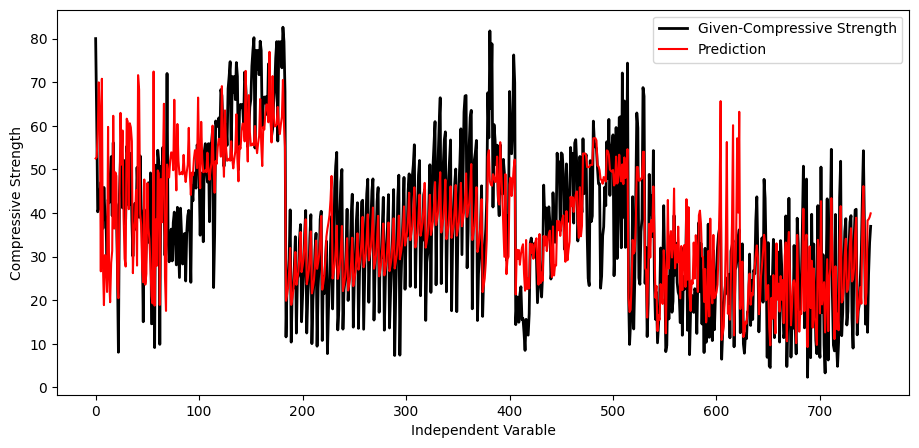

In [6]:
# Plotting the prediction made by model vs Given data
fig = plt.figure(figsize=(11, 5))

plt.plot(b, color = 'k', linewidth = 2, label = 'Given-Compressive Strength')
plt.plot(prediction, color = 'r', linewidth = 1.5, label = 'Prediction')
plt.xlabel('Independent Varable')
plt.ylabel('Compressive Strength')
plt.legend()


**Although there are statistical flutuations for each of the input data, but our simple linear regression model is capable of capturing almost the overall trend of the distribution.**

**Significance of different Attributes**

Text(0, 0.5, 'Significance or Slope')

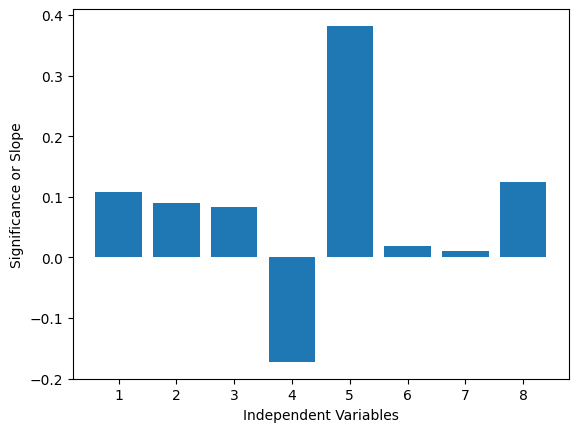

In [7]:
# Importance of the varaiables on the Concrete Compressive Strength:
instances = list(np.arange(1,9))
values = lss[0:8]

plt.bar(instances, values)
plt.xlabel('Independent Variables')
plt.ylabel('Significance or Slope')

The compressive strength of concrete is highly sensitive to changes in quantity of **water** and **Superplasticizer**, the former being inversly proportional and the latter being directly proportional.

#Working on the test data

In [8]:
b_test = np.array(test_data['Concrete compressive strength(MPa, megapascals) '])
A_test = np.array(test_data.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1))
print(f'The shape of the output vector is: {b_test.shape}')
print(f'The shape of the independent parameters is: {A_test.shape}')

The shape of the output vector is: (280,)
The shape of the independent parameters is: (280, 8)


In [9]:
#  Making predictions on the test inout data:
ones = np.ones(len(b_test))
A_aug_test =  np.column_stack((A_test, ones))
print(f'The shape of the independent parameters is: {A_aug_test.shape}')

test_prediction = np.matmul(A_aug_test, lss)
print(f'The shape of the prediction vector is: {test_prediction.shape}')

The shape of the independent parameters is: (280, 9)
The shape of the prediction vector is: (280,)


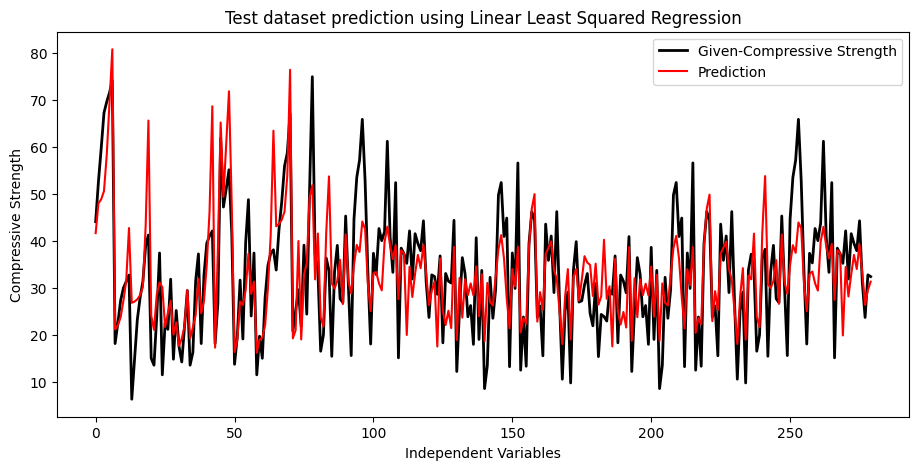

In [10]:
# Plotting the prediction vs the given data value in the output for the test dataset:
fig = plt.figure(figsize=(11, 5))

plt.plot(b_test, color = 'k', linewidth = 2, label = 'Given-Compressive Strength')
plt.plot(test_prediction, color = 'r', linewidth = 1.5, label = 'Prediction')
plt.xlabel('Independent Variables')
plt.ylabel('Compressive Strength')
plt.title('Test dataset prediction using Linear Least Squared Regression')
plt.legend()

The Least squared Regression Model Captures the overall trend even in the unseen test dataset.